In [12]:
import json
import glob
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
plt.style.use('~/.mplstyle')
plt.rcParams['figure.dpi'] = 150
plt.rcParams['savefig.dpi'] = 150
plt.rcParams['figure.figsize'] = 12,8

In [14]:
import numpy as np
def show_labels(df):
    # label points on the plot
    for x, y in zip(df['Experiment'], df['Accuracy']):
        # the position of the data label relative to the data point can be adjusted by adding/subtracting a value from the x &/ y coordinates
        plt.text(x = x, # x-coordinate position of data label
        y = y-150, # y-coordinate position of data label, adjusted to be 150 below the data point
        s = '{:.0f}'.format(y), # data label, formatted to ignore decimals
        color = 'purple') # set colour of line

In [19]:
def get_pdf(exp_folder="results_codex/"):
    df = pd.DataFrame(columns=["Experiment", "Digit", "Accuracy"])
    df.sort_values('Accuracy', ascending=False)
    df = df.loc[df['Experiment'] != 'main_order',:]
    df = df.sort_values('Accuracy', ascending=False)
    for file in glob.glob(f"{exp_folder}/*.json"):
        with open(file, "r") as f:
            d = json.load(f)
            name = file.replace(exp_folder, "")
            for k in ['3','4','5','6', '7']:
                if k in d:
                    df.loc[len(df)] = [name.split('.')[0], k, d[k]['accuracy']]
                else:
                    df.loc[len(df)] = [name.split('.')[0], k, pd.NA]
    pdf = df.replace('no_brackets', '(-) Brackets')
    pdf = pdf.replace('no_starting_from_rightmost_column', '(-) "Starting from \nrightmost column"')
    pdf = pdf.replace('without_comas_in_the_input', "(-) Comma")
    pdf = pdf.replace('main_reverse_order', "Predict only the\nreverse order")
    pdf = pdf.replace('main_correct_order_v2', "Predict only the\ncorrect order")
    pdf = pdf.replace('no_instruction', "(-) Instruction")
    pdf = pdf.replace('no_carry_on_indicator', "(-) (c=carry)")
    pdf = pdf.replace('no_write_carry_string', "(-) write x cary y")
    pdf = pdf.replace('no_perfect_calculator', '(-) "I am a perfect Calculator"')
    pdf = pdf.replace('no_left_to_right', '(-) "Least significant digit to \nmost significant digit"')
    # pdf = pdf.replace('main_eval_in_correct_order', '(-) eval from reverse order')
    return pdf
    
def plot_pdf(pdf):
    fig, ax = plt.subplots(figsize=(12,8))
    sns.pointplot(ax=ax, data=pdf[pdf['Experiment'] != 'main'], x="Experiment", y="Accuracy", hue='Digit', marker='.', scale = 0.5)
    plt.title("Integer Addition with Ablated Prompts")
    plt.xlabel("Ablations")
    plt.xticks(rotation=90)
    pdf = pdf.set_index(['Experiment', 'Digit'])
    ax.axhline(pdf.loc['main', '3'][0], color=sns.color_palette()[0], linestyle='-', linewidth=1)
    ax.axhline(pdf.loc['main', '4'][0], color=sns.color_palette()[1], linestyle='--', linewidth=1)
    ax.axhline(pdf.loc['main', '5'][0], color=sns.color_palette()[2], linestyle='--', linewidth=1)
    ax.axhline(pdf.loc['main', '6'][0], color=sns.color_palette()[3], linestyle='--', linewidth=1)
    ax.set_yticks(np.linspace(0,0.9,10));
    
def plot_comparisons(pdf, prefix):
    folder = os.path.join("figures", prefix)
    os.makedirs(folder, exist_ok=True)
    color_palette = sns.color_palette("coolwarm")
    color_palette[:4] = [color_palette[1],color_palette[2], color_palette[3], color_palette[0]]
    sns.set_palette(color_palette)
    ### comp1
    fig, ax = plt.subplots(figsize=(12,8))
    df1 = pdf.reset_index().set_index('Experiment').loc[['gpt3_style', 'gpt3_style_zero_shot', 'main_eval_in_correct_order']].reset_index()
    df1 = df1.replace("gpt3_style", "Few-Shot")
    df1 = df1.replace("gpt3_style_zero_shot", "Zero-Shot")
    df1 = df1.replace("main_eval_in_correct_oder", "Scratchpad")
    df1.Digit = df1.Digit.astype(int)
    ax = sns.barplot(ax=ax, data=df1.reset_index(), x="Digit", y="Accuracy", hue='Experiment')
    # plt.title("Effect of the format in Few-Shot Examples")
    plt.savefig(os.path.join(folder,"fewshot_zeroshot_scratchpad_plot.jpeg"))
    color_palette[:4] = [color_palette[2],color_palette[0], color_palette[1], color_palette[0]]
    sns.set_palette(color_palette)
    ### comp2
    fig, ax = plt.subplots(figsize=(12,8))
    df1 = pdf.reset_index().set_index('Experiment').loc[['main_eval_in_correct_order', 'gpt3_style_comma']].reset_index()
    df1 = df1.replace("gpt3_style_comma", "Few Shot-Comma")
    df1 = df1.replace("main_eval_in_correct_order", "Scratchpad")
    df1.Digit = df1.Digit.astype(int)
    ax = sns.barplot(ax=ax, data=df1.reset_index(), x="Digit", y="Accuracy", hue='Experiment')
    plt.savefig(os.path.join(folder, "comma_scratchpad_fewshot_plot.jpeg"))
    ### comp3
    fig, ax = plt.subplots(figsize=(12,8))
    df1 = pdf.reset_index().set_index('Experiment').loc[['gpt3_style', 'gpt3_style_space', 'gpt3_style_comma']].reset_index()
    df1 = df1.replace("gpt3_style", "No Delimeter")
    df1 = df1.replace("gpt3_style_space", "Space")
    df1 = df1.replace("gpt3_style_comma", "Comma")
    df1.Digit = df1.Digit.astype(int)
    ax = sns.barplot(ax=ax, data=df1.reset_index(), x="Digit", y="Accuracy", hue='Experiment')
    plt.savefig(os.path.join(folder,"different_fewshot_prompts_plot.jpeg"))
    ### comp4
    fig, ax = plt.subplots(figsize=(12,8))
    df1 = pdf.reset_index().set_index('Experiment').loc[['main_eval_in_correct_order', '(-) write x cary y']].reset_index()
    df1 = df1.replace("main_eval_in_correct_order", "Scratchpad")
    df1.Digit = df1.Digit.astype(int)
    ax = sns.barplot(ax=ax, data=df1.reset_index(), x="Digit", y="Accuracy", hue='Experiment')
    plt.savefig(os.path.join(folder,"no_write_carry_plot.jpeg"))
    ### comp5
    fig, ax = plt.subplots(figsize=(12,8))
    df1 = pdf.reset_index().set_index('Experiment').loc[['main_eval_in_correct_order', 'Predict only the\ncorrect order']].reset_index()
    df1 = df1.replace("main_eval_in_correct_order", "Scratchpad")
    df1 = df1.replace('Predict only the\ncorrect order', "(-) reverse order")
    df1.Digit = df1.Digit.astype(int)
    ax = sns.barplot(ax=ax, data=df1.reset_index(), x="Digit", y="Accuracy", hue='Experiment')
    plt.savefig(os.path.join(folder,"no_reverse.jpeg"))
    ### comp6
    fig, ax = plt.subplots(figsize=(12,8))
    df1 = pdf.reset_index().set_index('Experiment').loc[['main_eval_in_correct_order', '(-) (c=carry)']].reset_index()
    df1 = df1.replace("main_eval_in_correct_order", "Scratchpad")
    # df1 = df1.replace('Predict only the\ncorrect order', "(-) reverse order")
    df1.Digit = df1.Digit.astype(int)
    ax = sns.barplot(ax=ax, data=df1.reset_index(), x="Digit", y="Accuracy", hue='Experiment')
    plt.savefig(os.path.join(folder,"no_carry_indicator.jpeg"))
    #comp 7
    fig, ax = plt.subplots(figsize=(12,8))
    df1 = pdf.reset_index().set_index('Experiment').loc[['main_eval_in_correct_order', '(-) "I am a perfect Calculator"']].reset_index()
    df1 = df1.replace("main_eval_in_correct_order", "Scratchpad")
    # df1 = df1.replace('Predict only the\ncorrect order', "(-) reverse order")
    df1.Digit = df1.Digit.astype(int)
    ax = sns.barplot(ax=ax, data=df1.reset_index(), x="Digit", y="Accuracy", hue='Experiment')
    plt.savefig(os.path.join(folder,"no_perfect_calculator.jpeg"))
    # comp 8
    fig, ax = plt.subplots(figsize=(12,8))
    df1 = pdf.reset_index().set_index('Experiment').loc[['main_eval_in_correct_order', '(-) "Starting from \nrightmost column"']].reset_index()
    df1 = df1.replace("main_eval_in_correct_order", "Scratchpad")
    # df1 = df1.replace('Predict only the\ncorrect order', "(-) reverse order")
    df1.Digit = df1.Digit.astype(int)
    ax = sns.barplot(ax=ax, data=df1.reset_index(), x="Digit", y="Accuracy", hue='Experiment')
    plt.savefig(os.path.join(folder,"no_starting_from_rightmost_column.jpeg"))
    # comp 9
    fig, ax = plt.subplots(figsize=(12,8))
    df1 = pdf.reset_index().set_index('Experiment').loc[['main_eval_in_correct_order', 'main_zero_shot', 'main_zero_shot_v2']].reset_index()
    df1 = df1.replace("main_eval_in_correct_order", "Scratchpad")
    df1 = df1.replace('main_zero_shot', "Zero-shot Step-by-Step v1")
    df1 = df1.replace('main_zero_shot_v2', "Zero-shot Step-by-Step v2")
    df1.Digit = df1.Digit.astype(int)
    ax = sns.barplot(ax=ax, data=df1.reset_index(), x="Digit", y="Accuracy", hue='Experiment')
    plt.savefig(os.path.join(folder,"zeroshot_prompts.jpeg"))
    
    

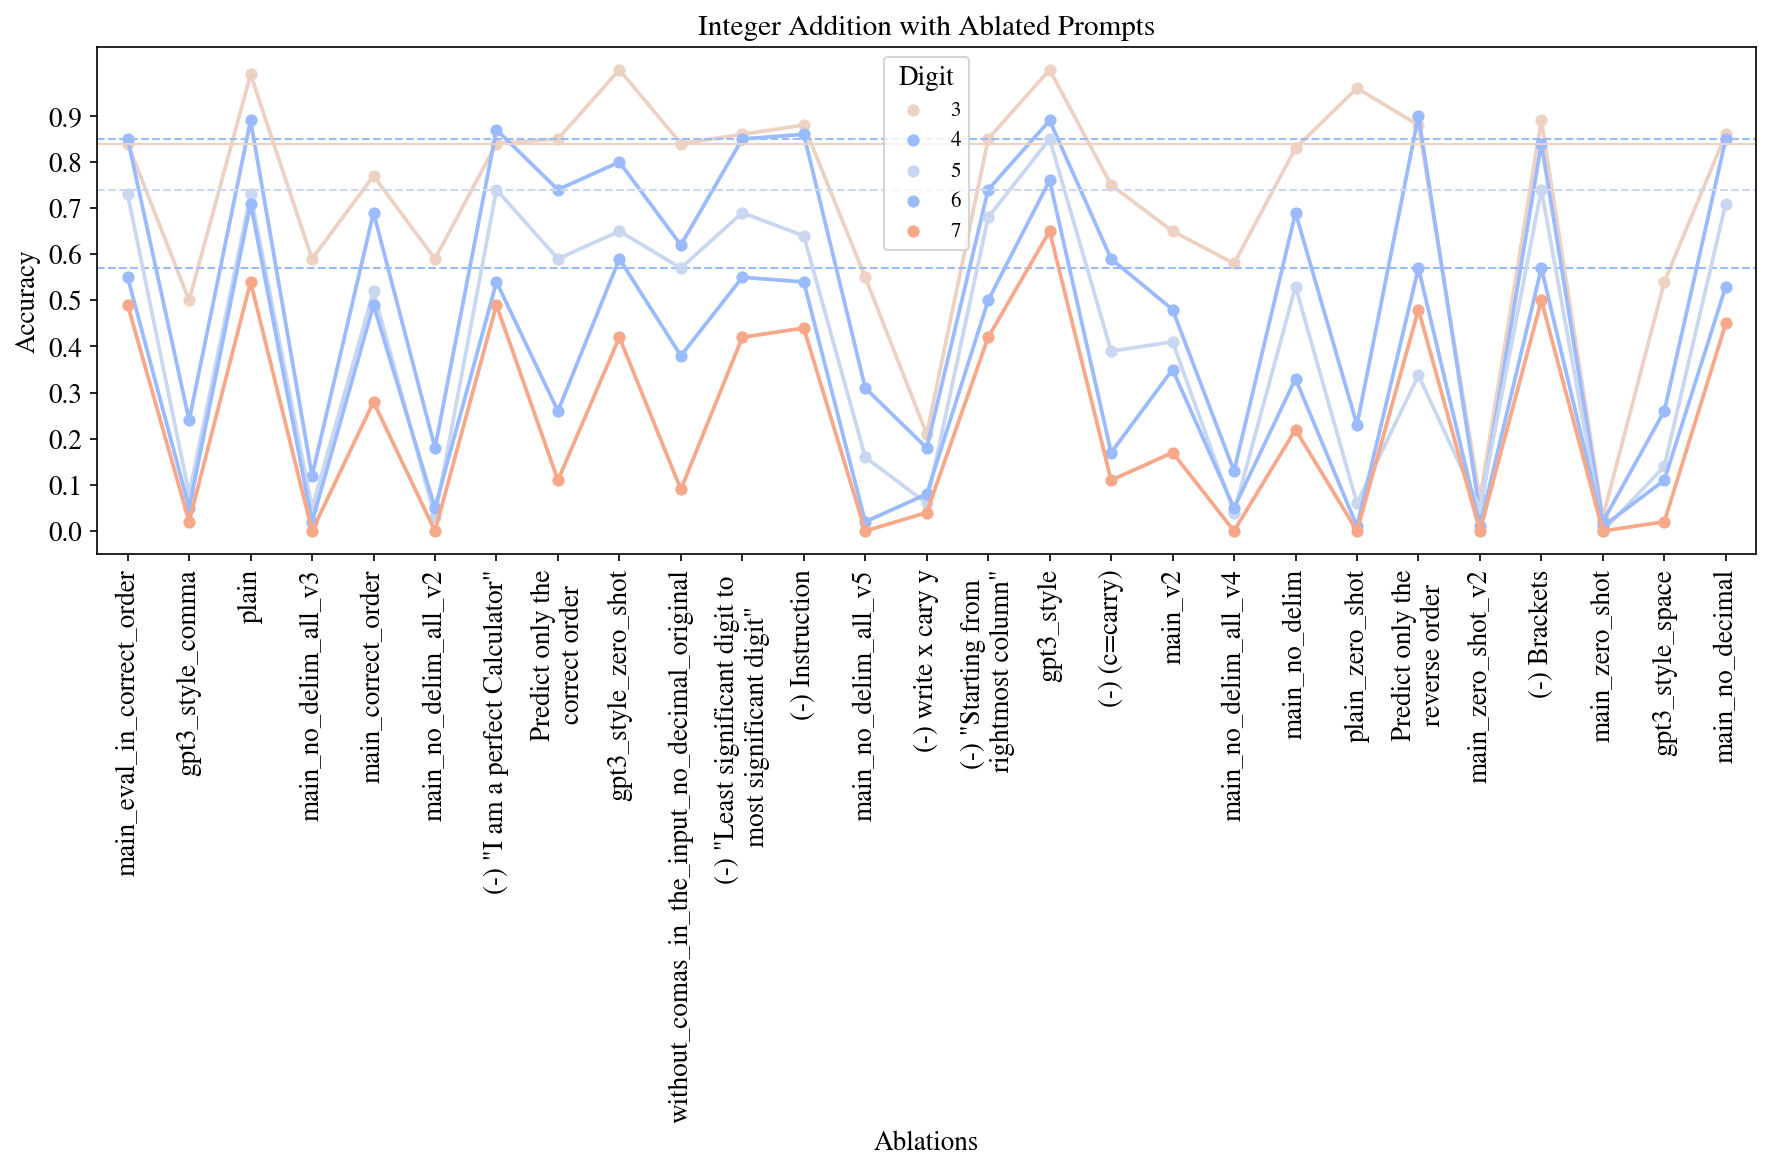

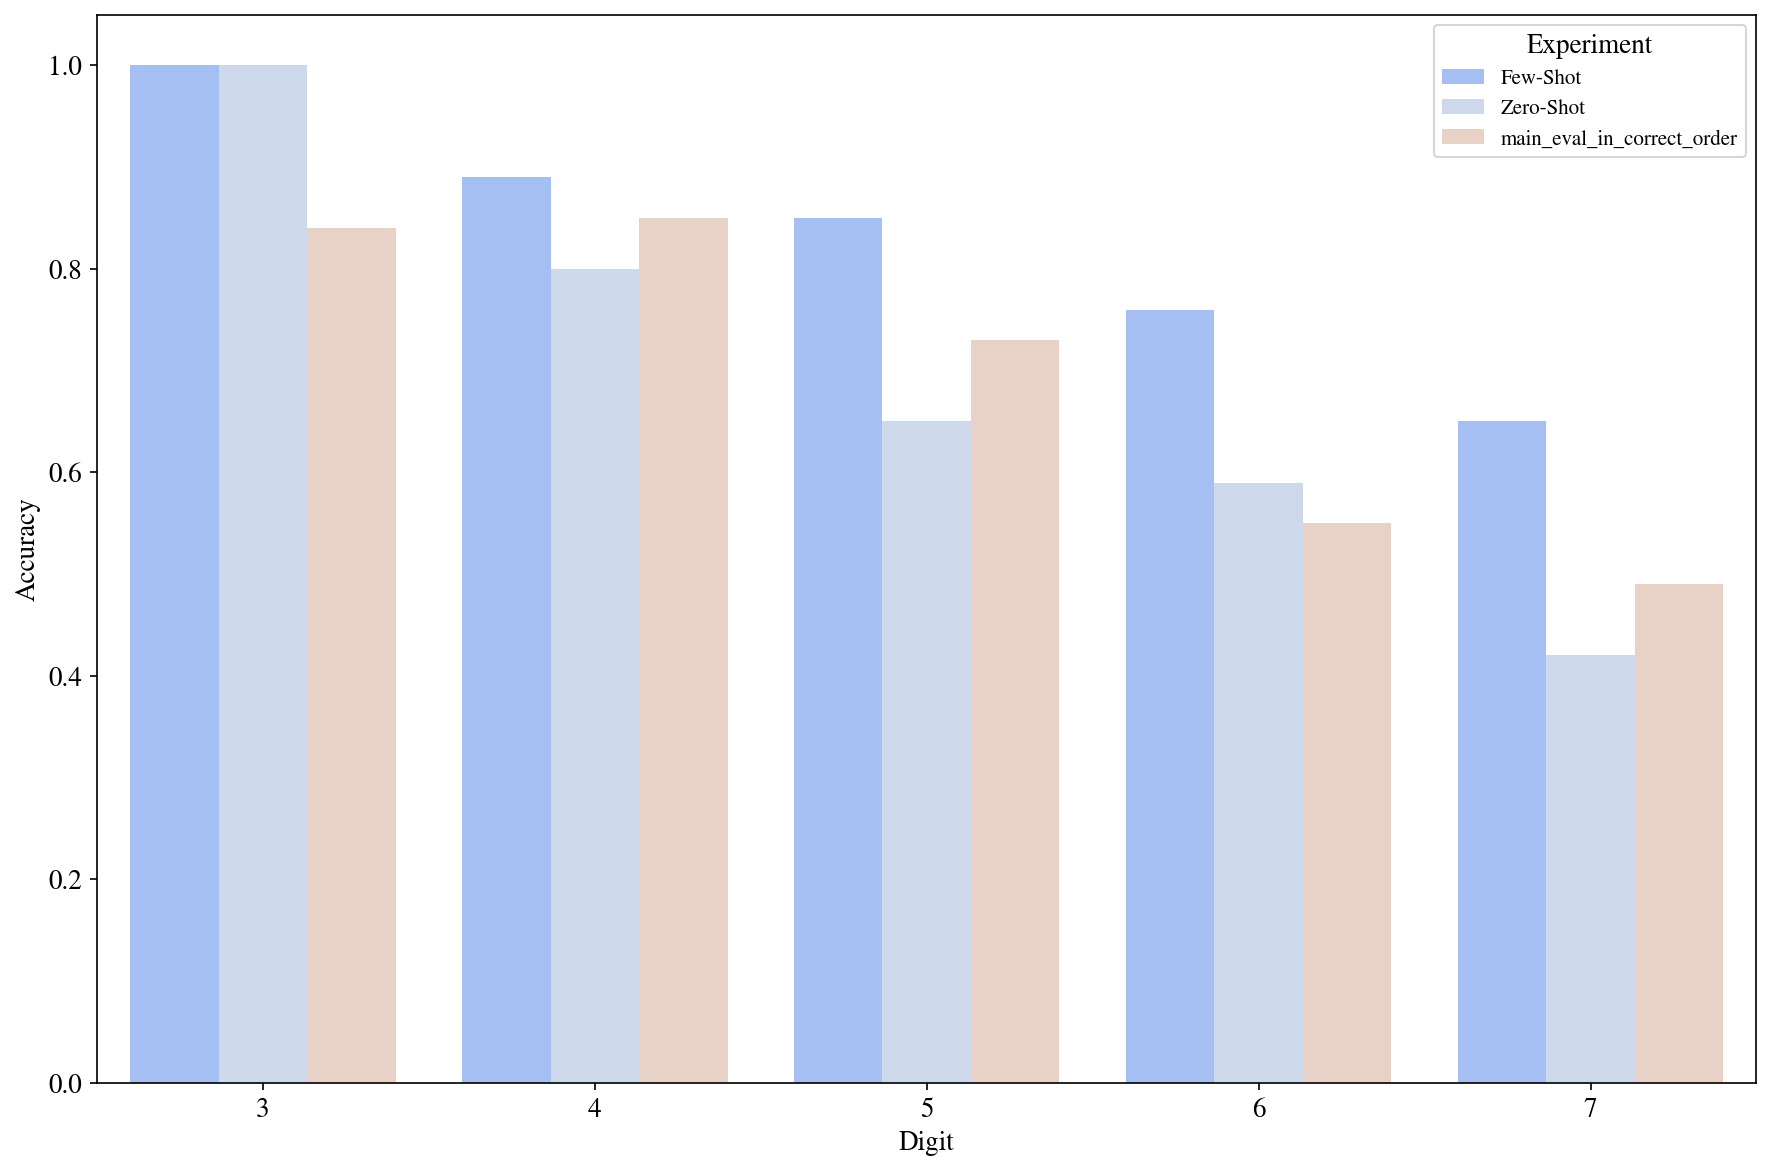

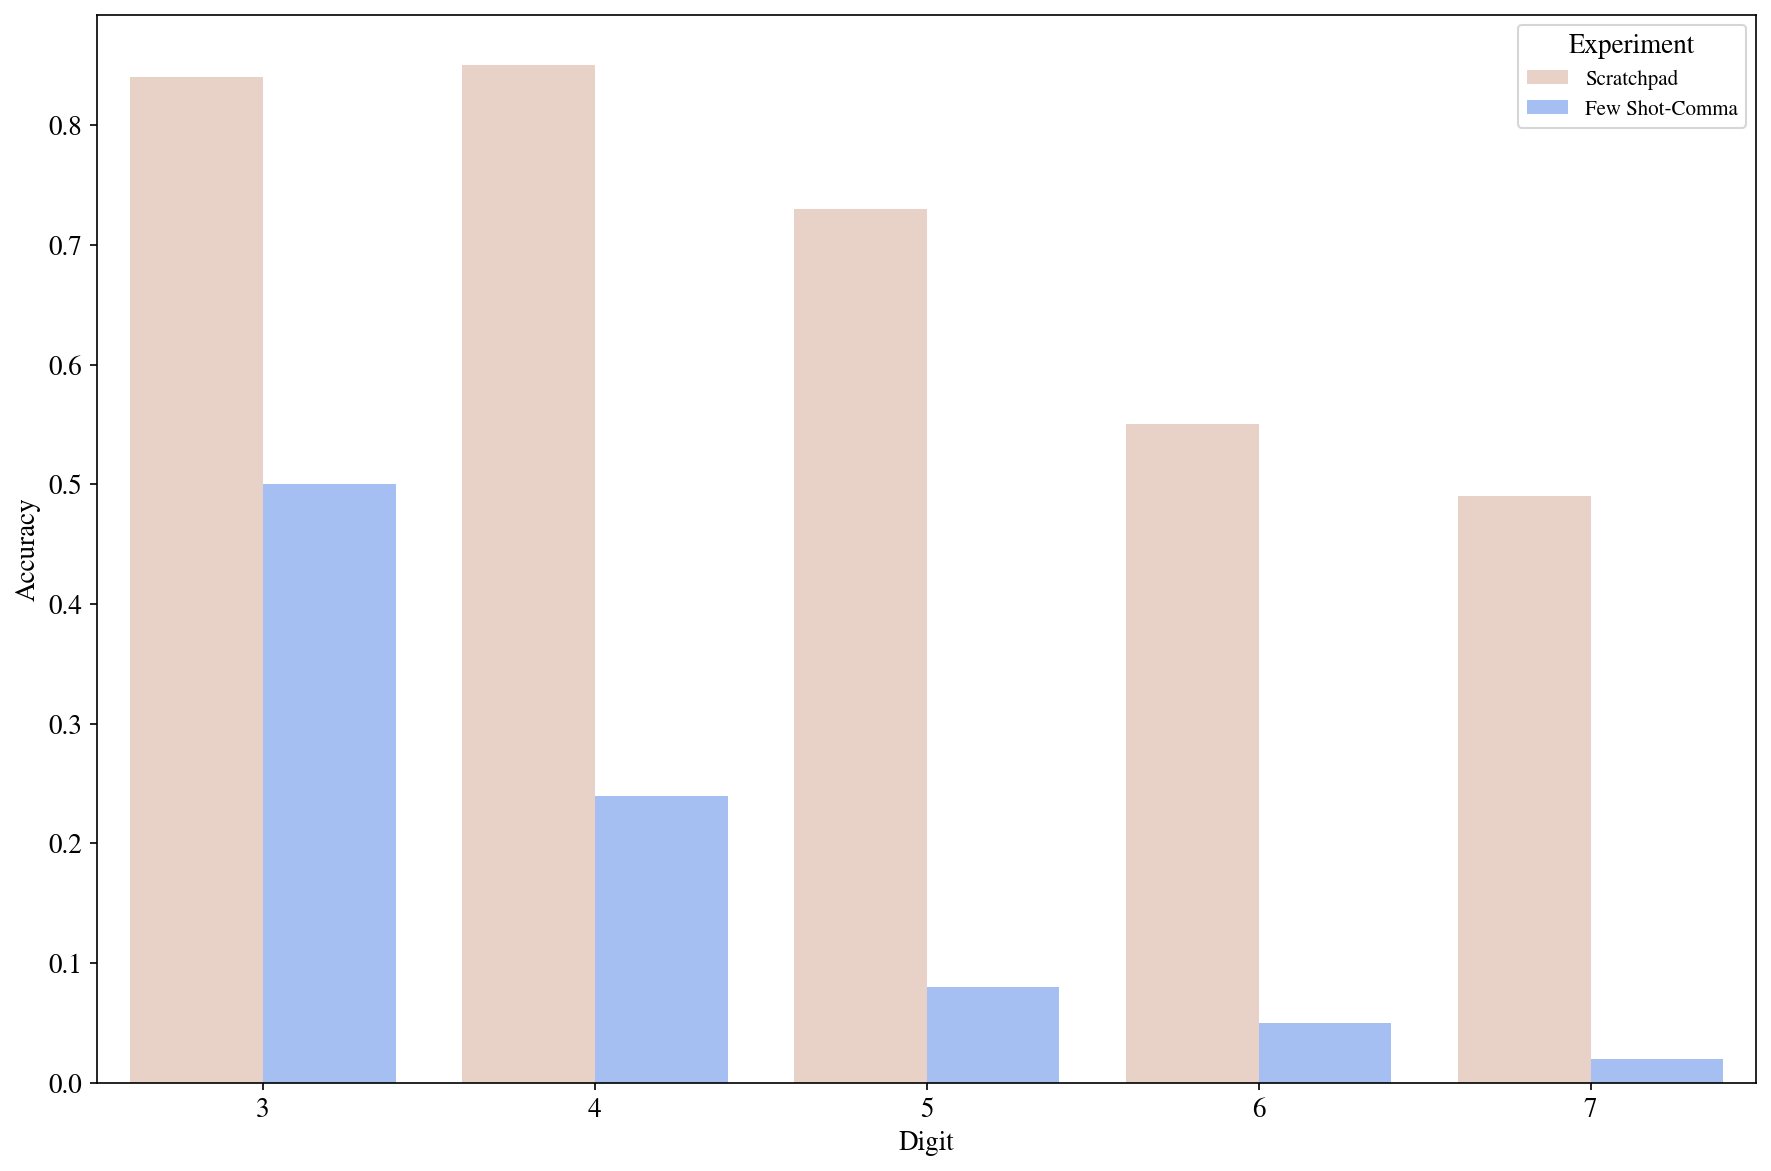

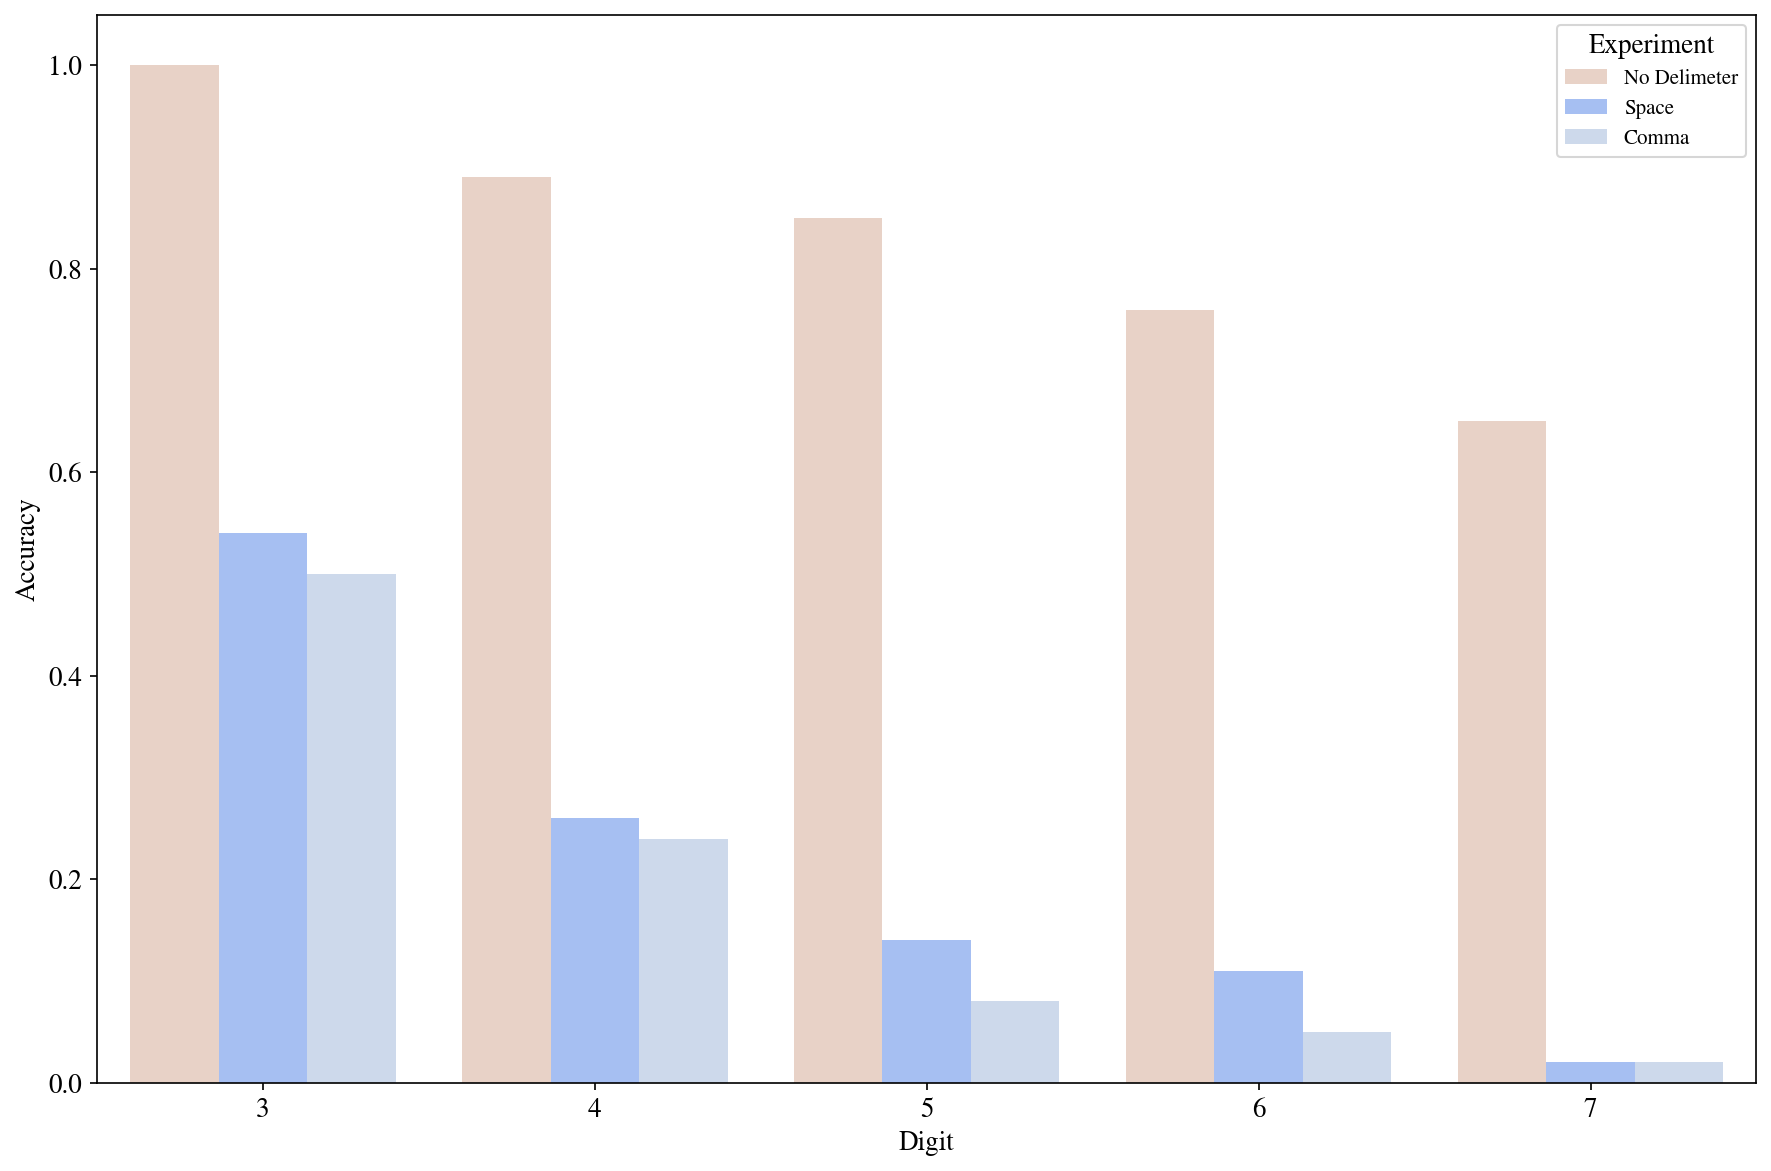

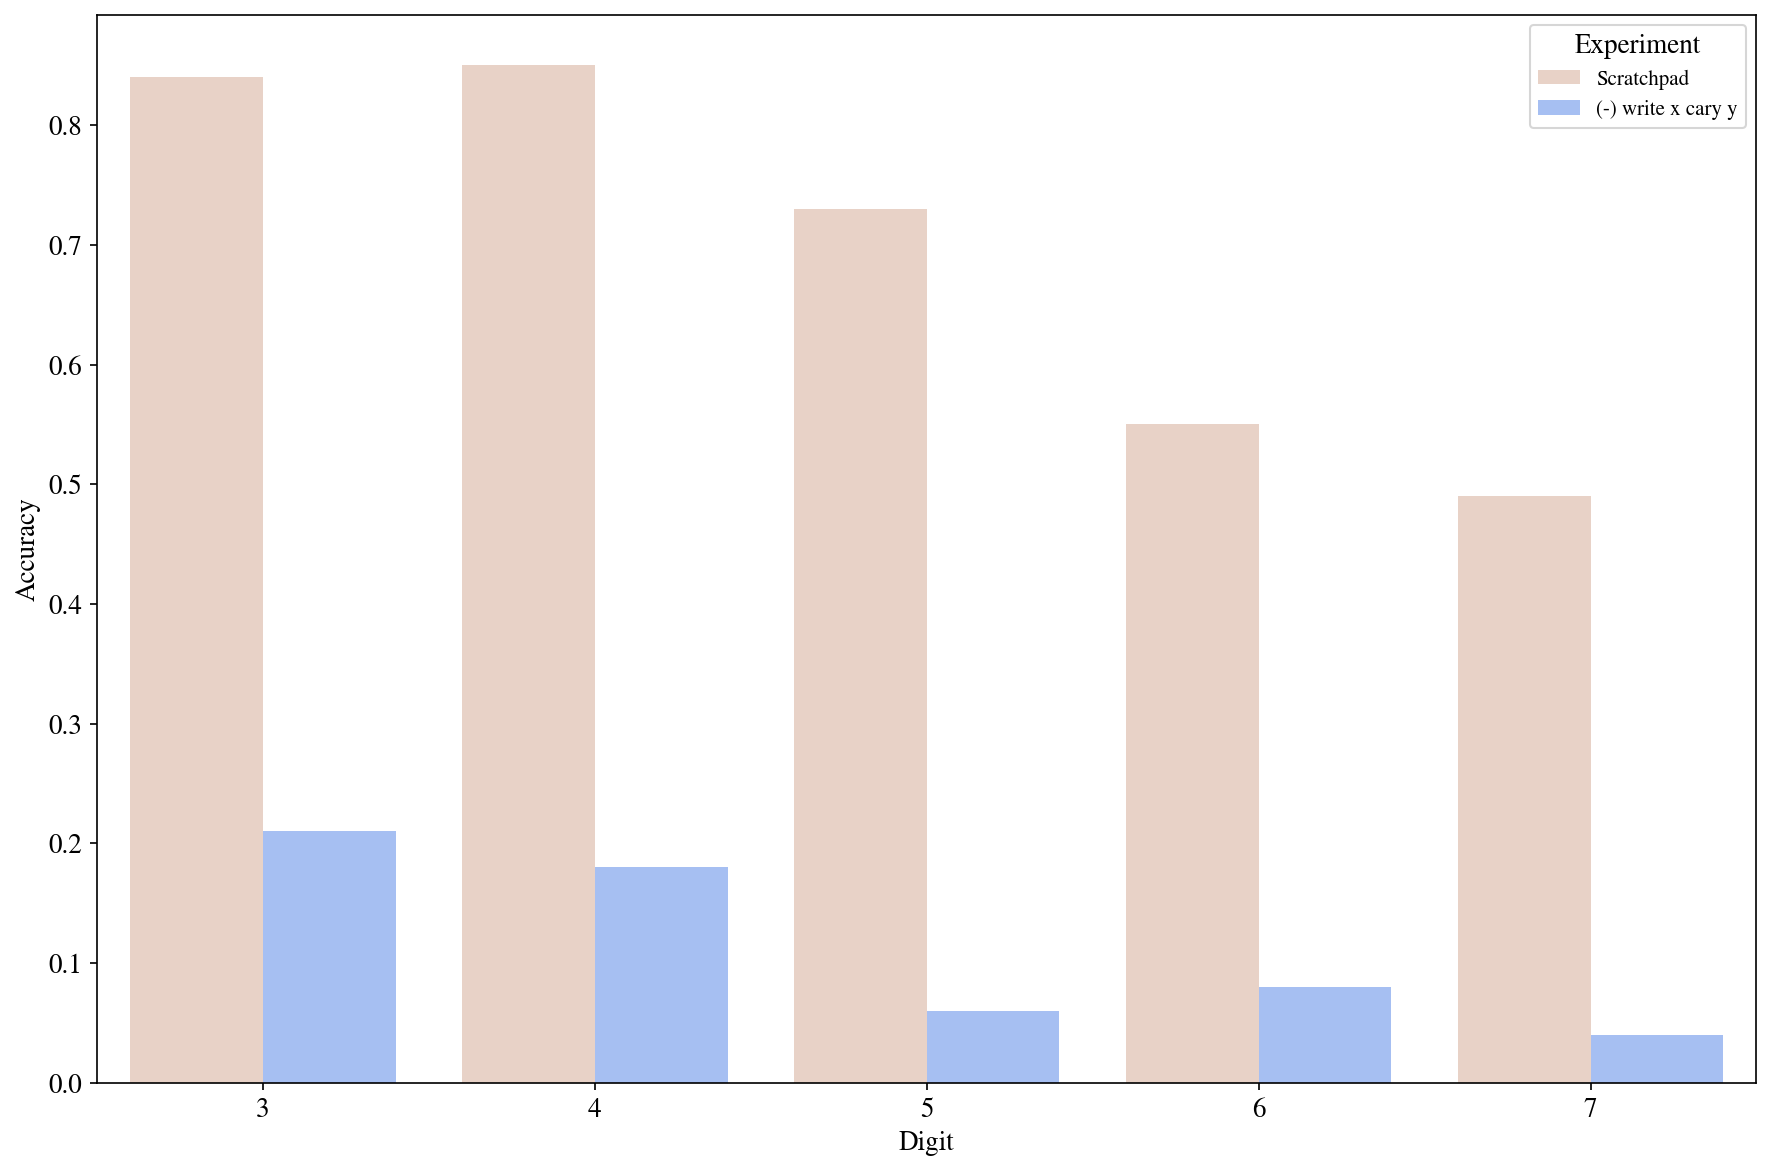

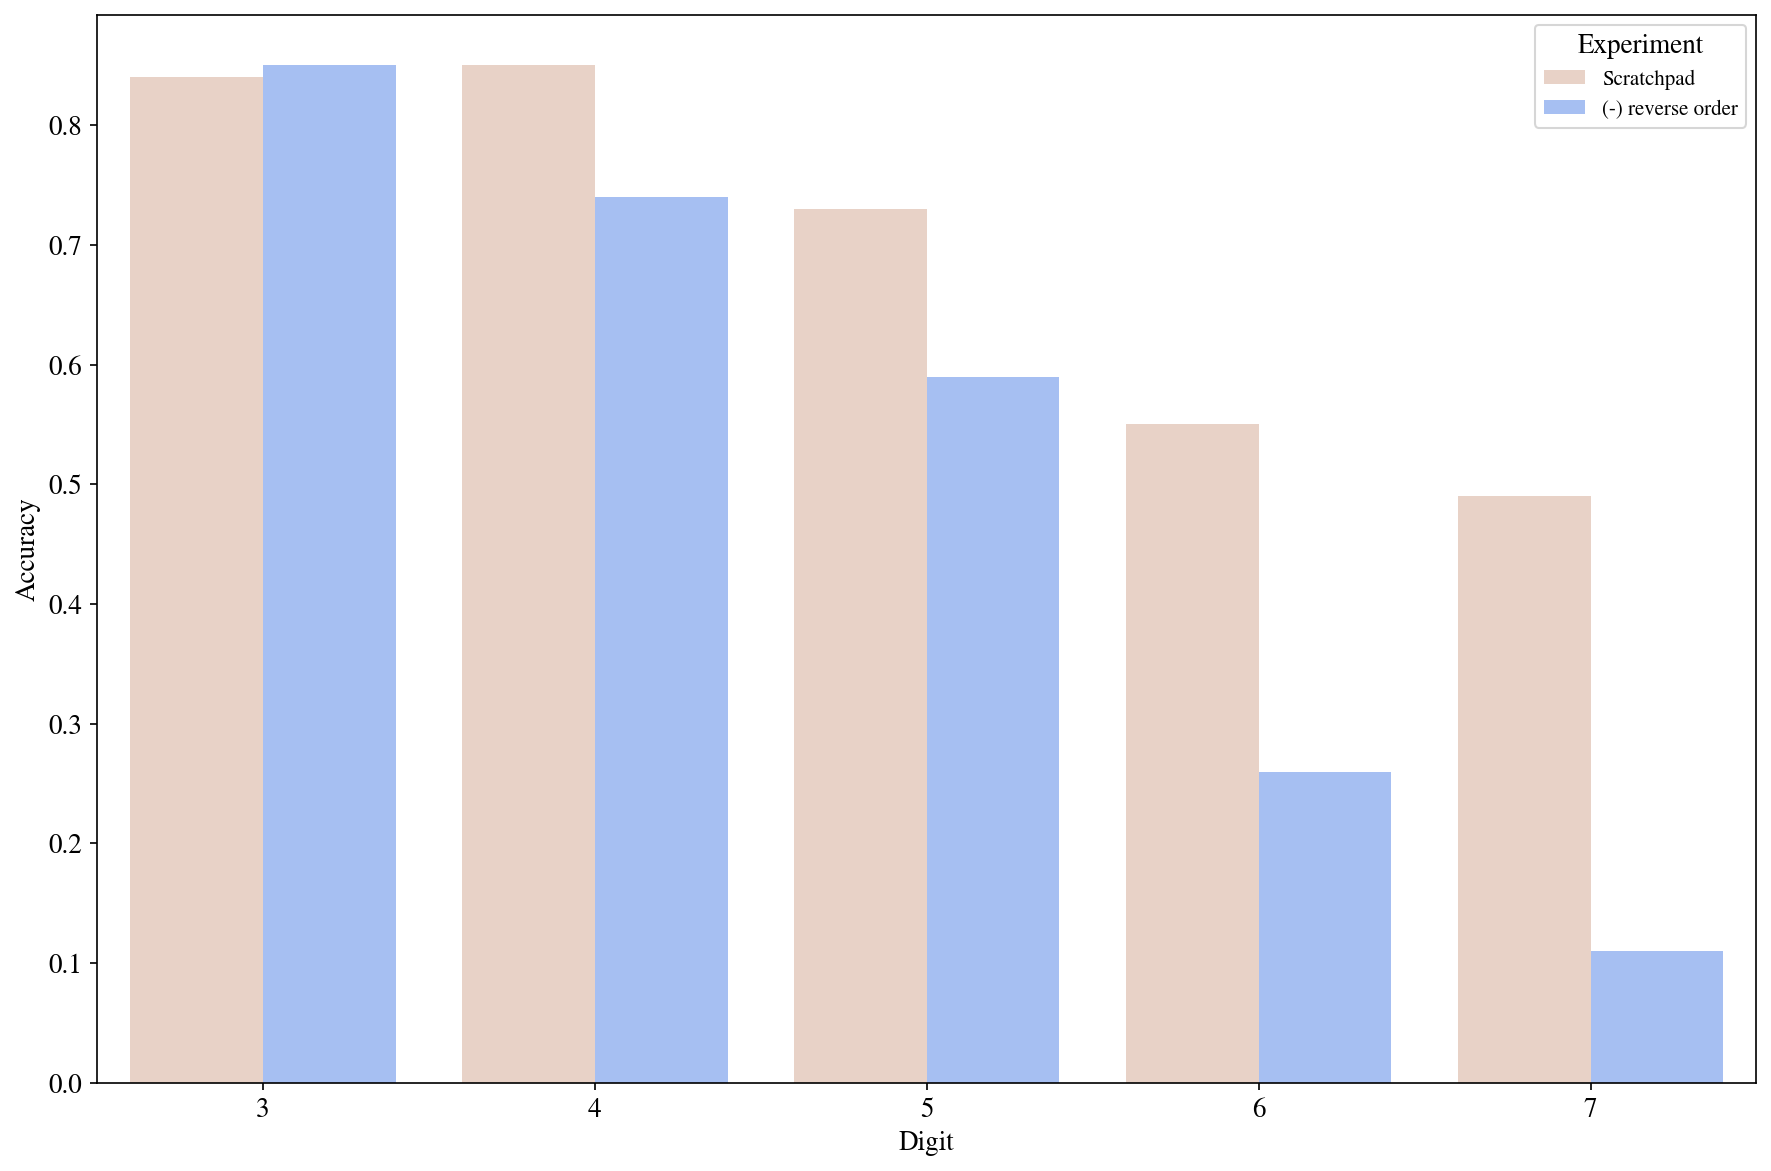

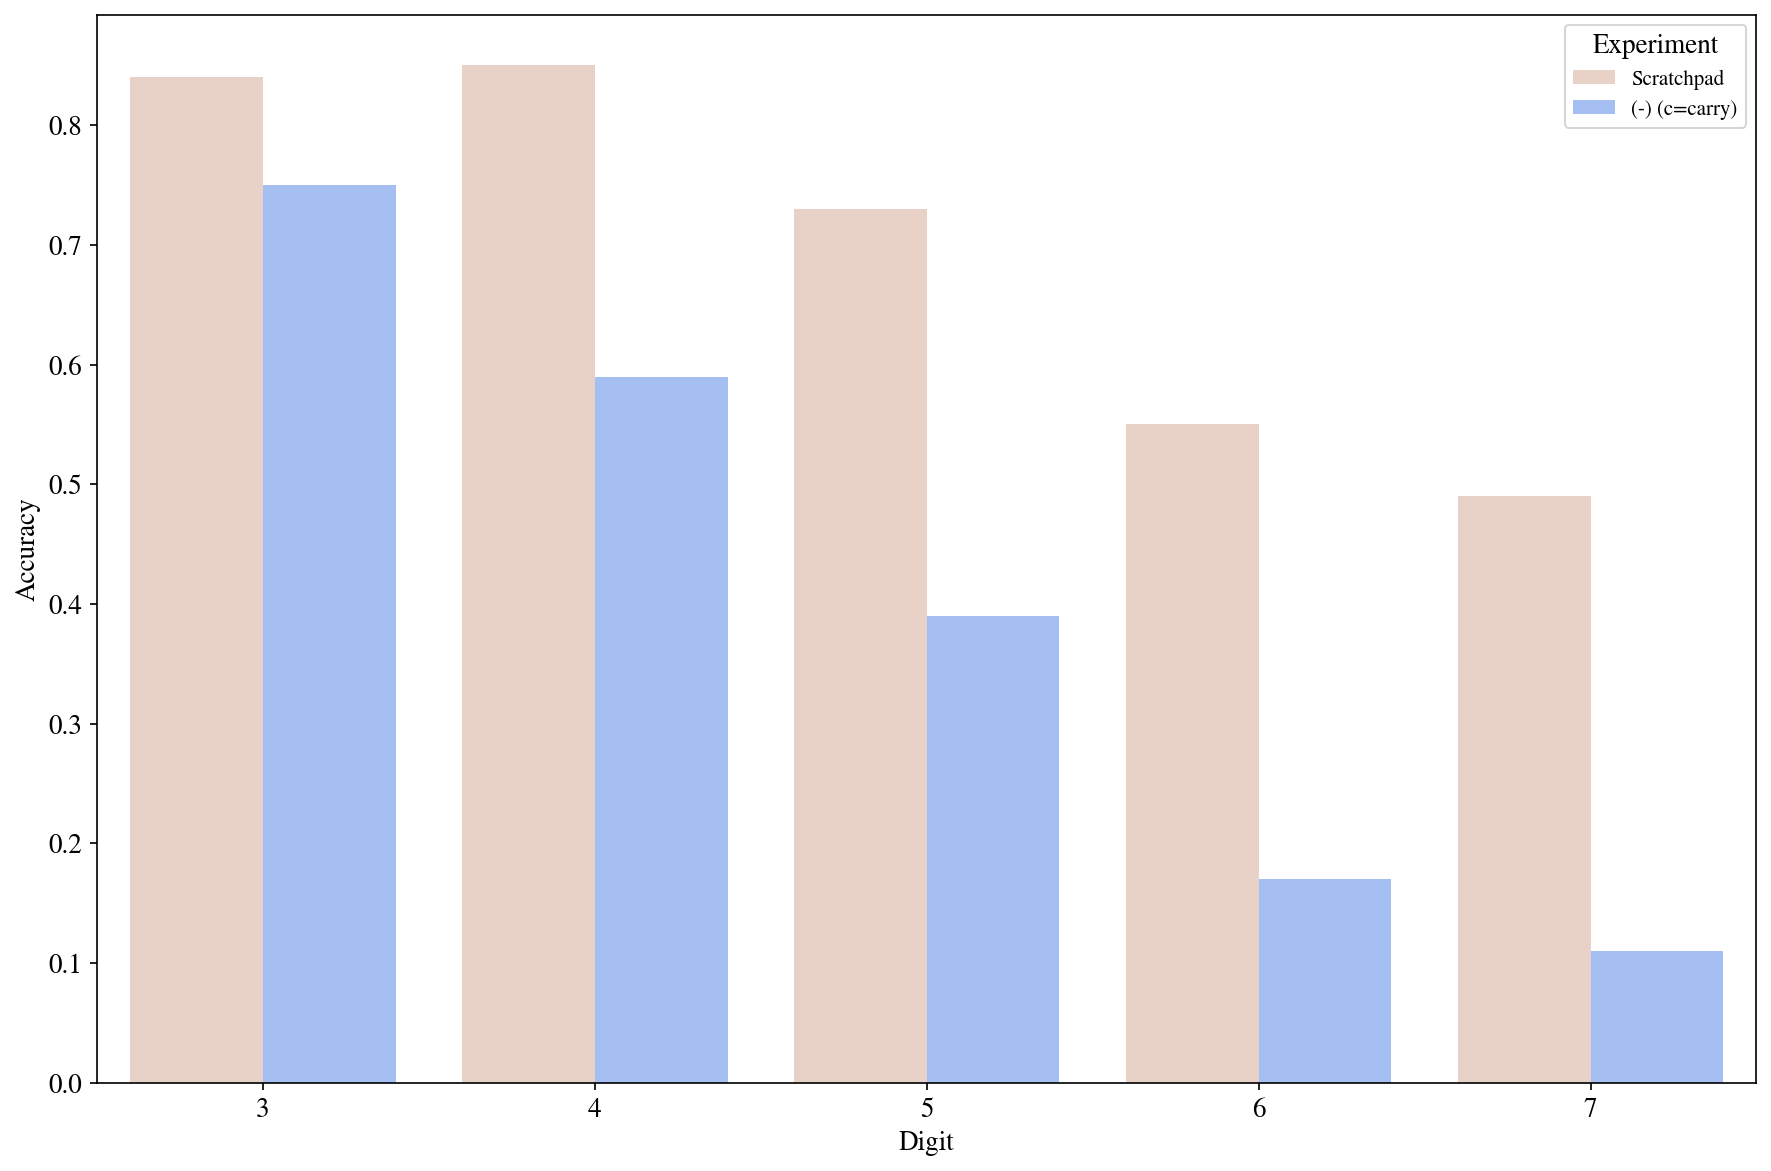

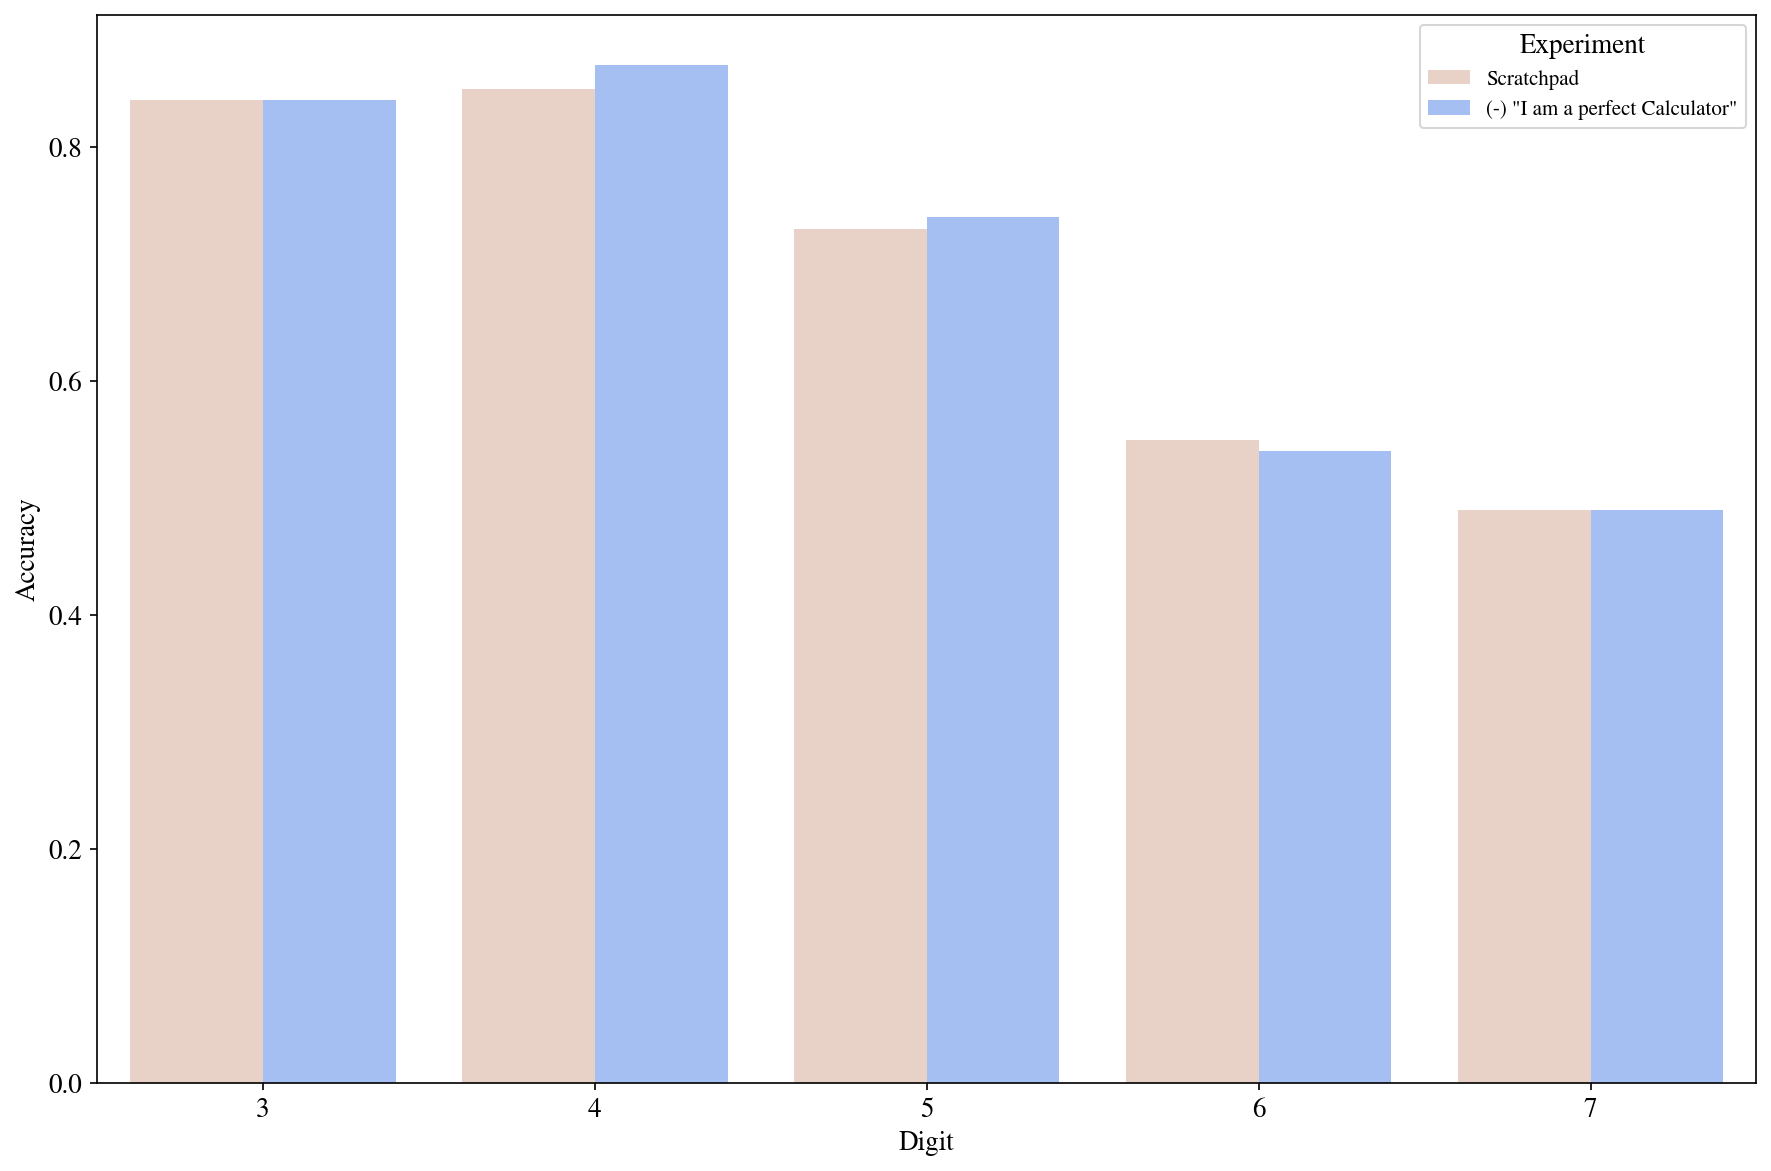

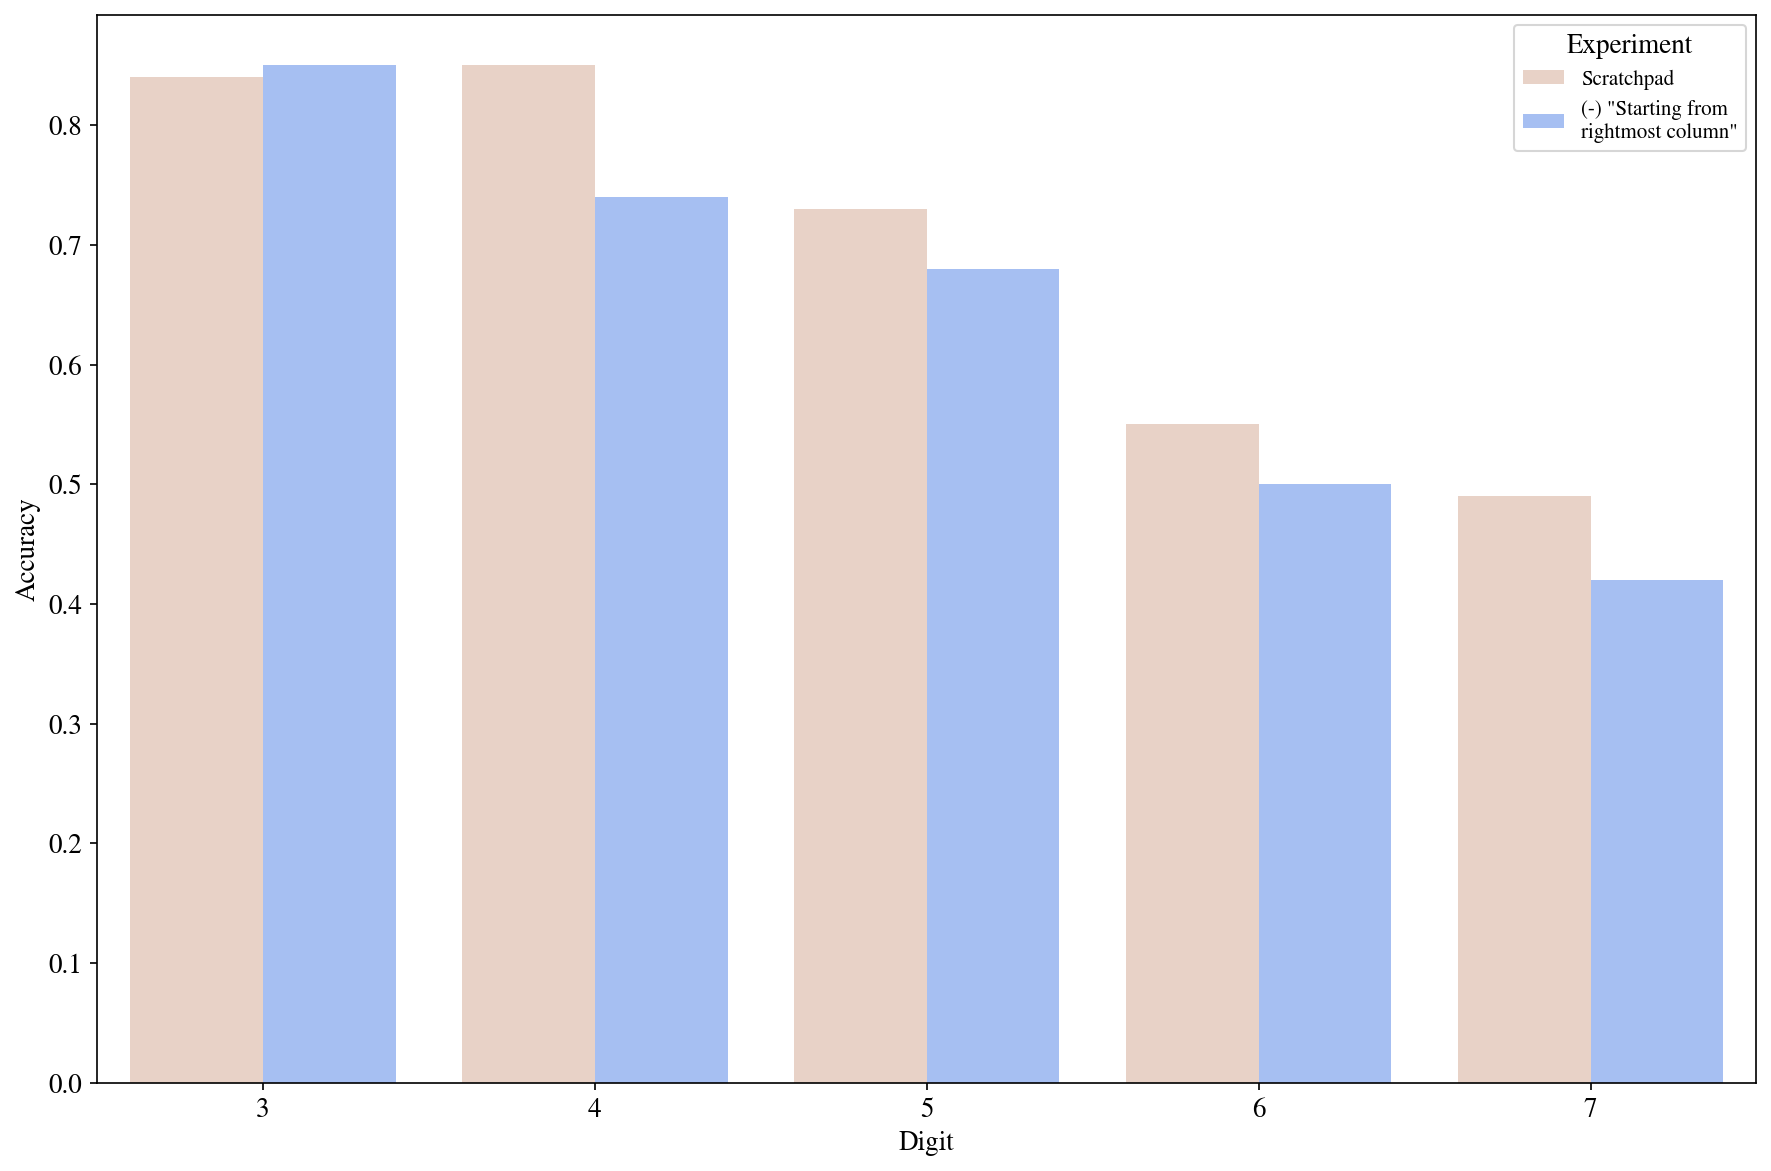

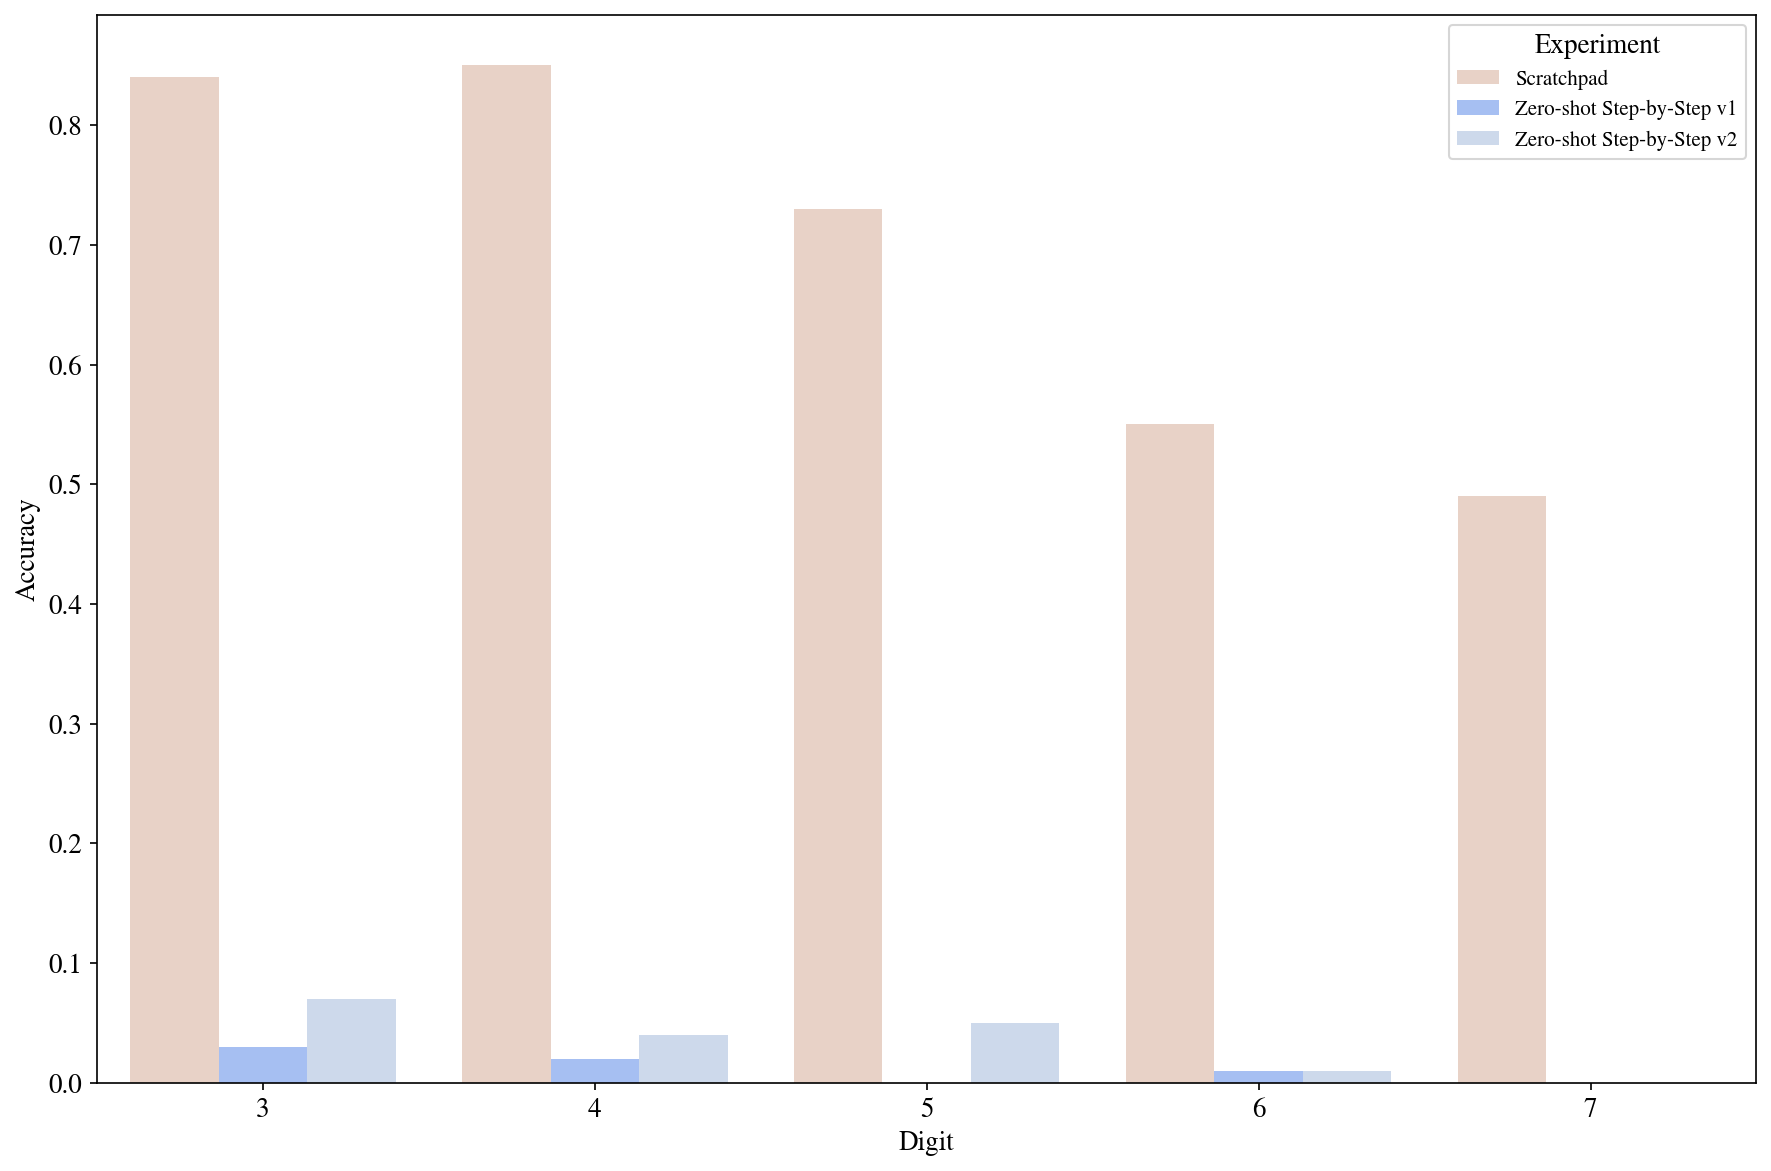

In [20]:
pdf = get_pdf("results_codex/")
plot_pdf(pdf)
plot_comparisons(pdf, prefix="results_codex/")

In [ ]:
plot_exp_folder("results_davinci/")